In [29]:
# Observação: 'Customer Age' contém um espaço no final -> 'Customer Age '
# Aqui está um exemplo de como o espaço em branco desnecessário pode ser removido apenas no início e no final de cada nome de coluna, sem afetar os espaços entre as palavras

# Remover espaços extras dos nomes das colunas
data_cleaned.columns = data_cleaned.columns.str.strip()

# Verificar se os nomes das colunas foram corrigidos
print(data_cleaned.columns)

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age', 'Gender', 'Source', 'Country', 'State', 'Latitude', 'Longituide', 'Age Group'], dtype='object')


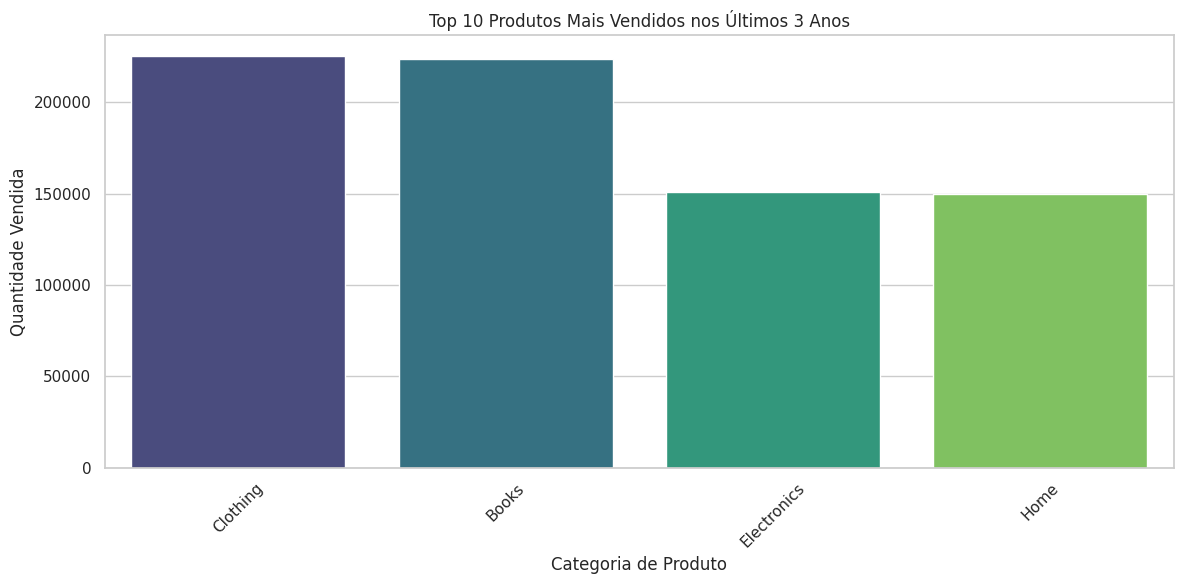

Produto mais caro:


Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide,Age Group
30759,24/11/2021,Electronics,500,5,4498,7,21,Female,Instagram Campign,United States,California,36.116203,-119.681564,19-25



Produto mais barato:


Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide,Age Group
20078,29/01/2023,Electronics,10,3,4274,9,21,Male,Instagram Campign,United States,California,36.116203,-119.681564,19-25


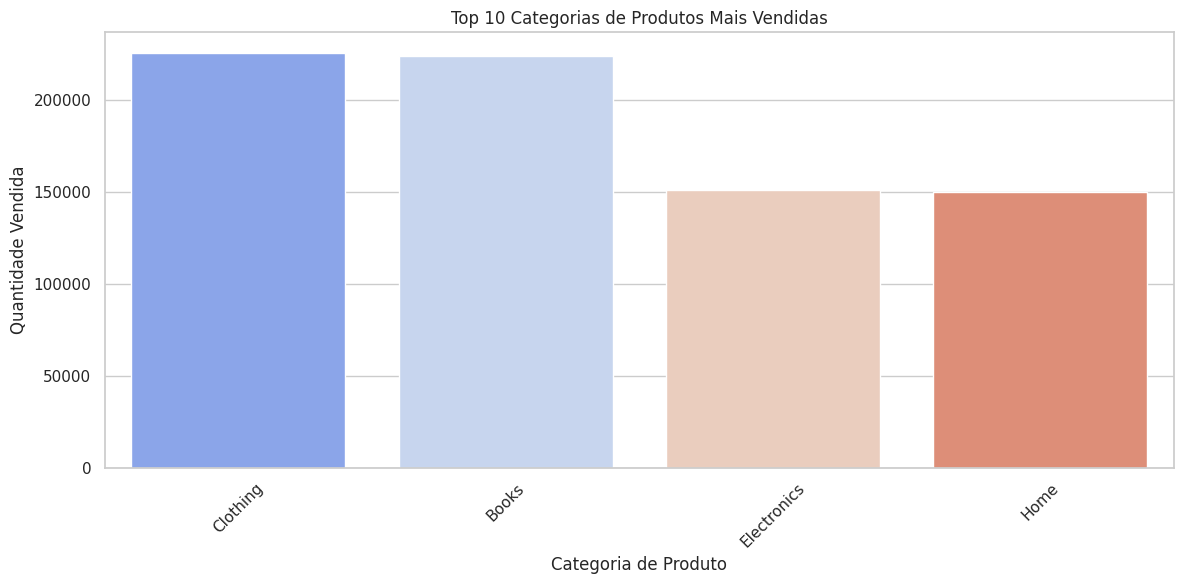

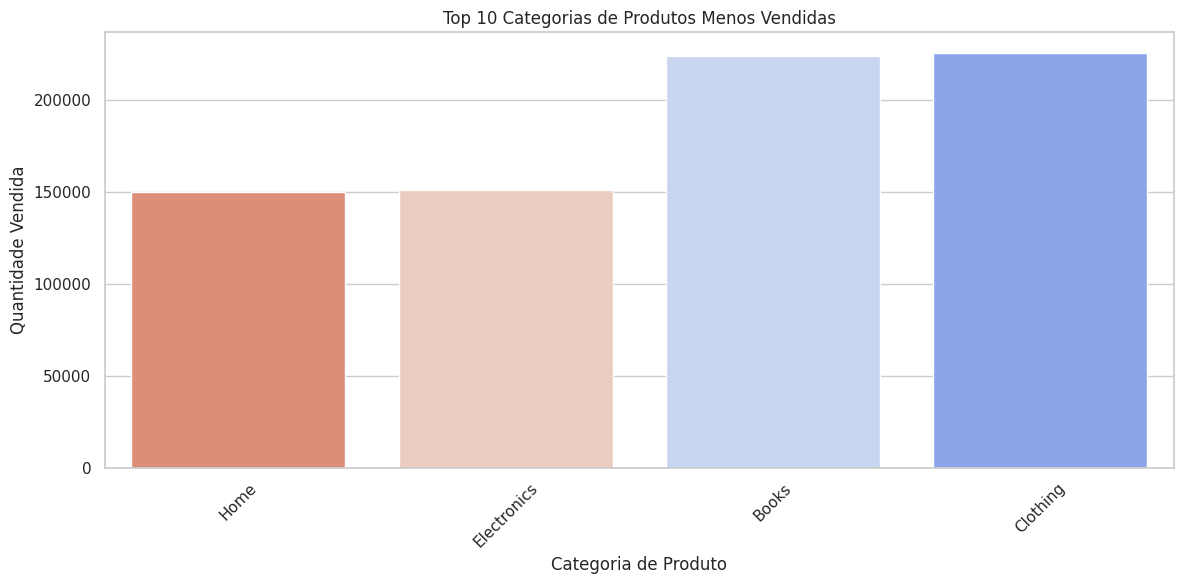

Categoria mais cara:


Product Category,Home
,254.841688



Categoria mais barata:


Product Category,Clothing
,254.446264


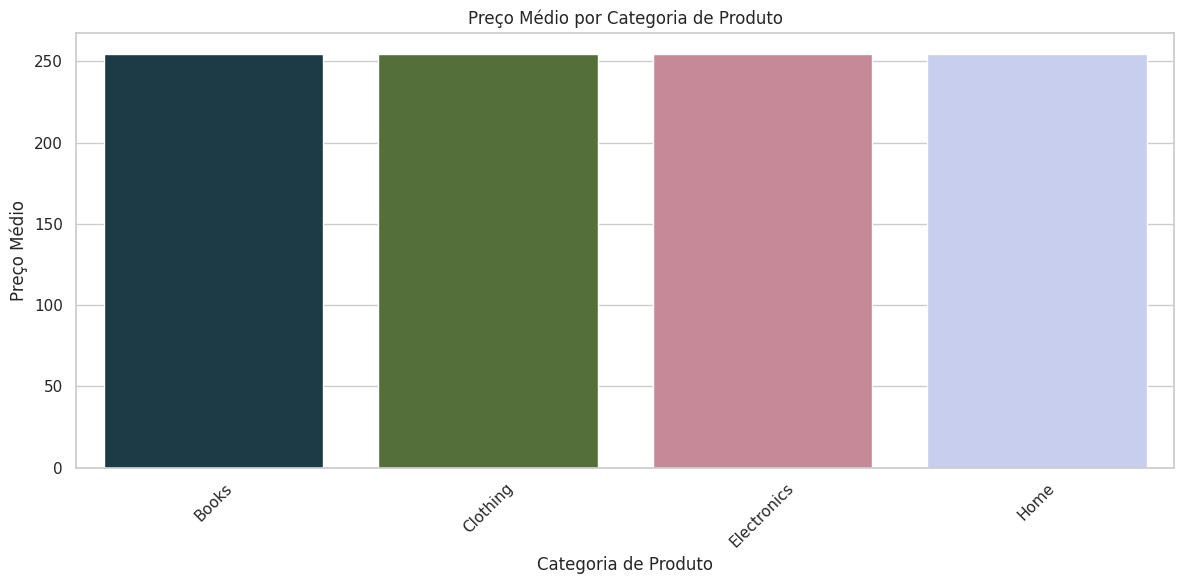

Produto com melhor NPS:


Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide,Age Group
46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482,19-25



Produto com pior NPS:


Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide,Age Group
28805,31/03/2021,Clothing,366,1,246,0,20,Male,FaceBook campaign,United States,California,36.116203,-119.681564,19-25


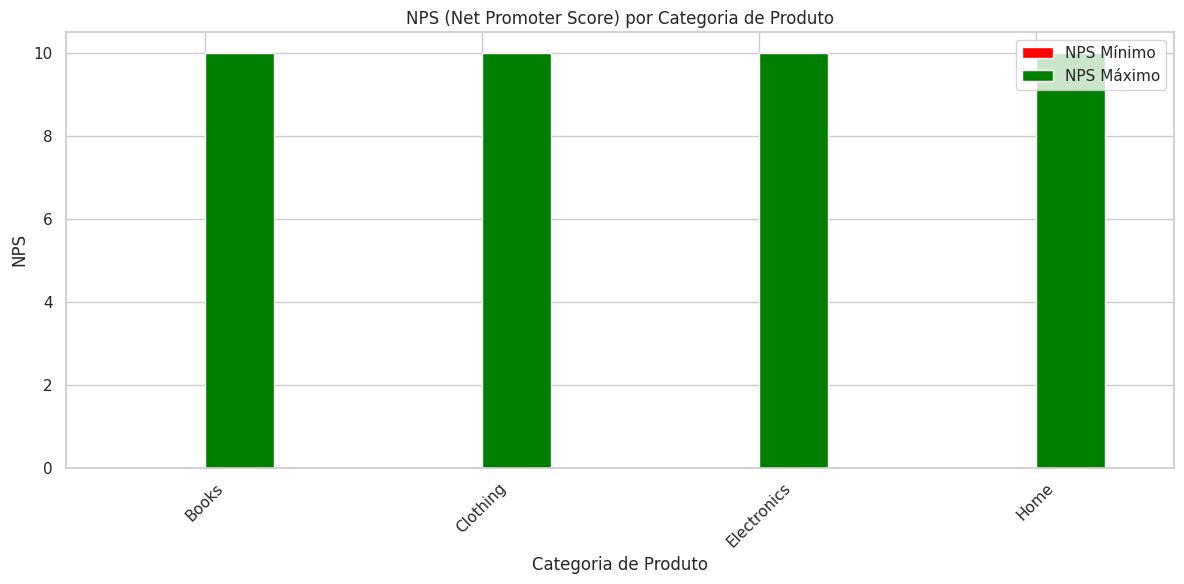

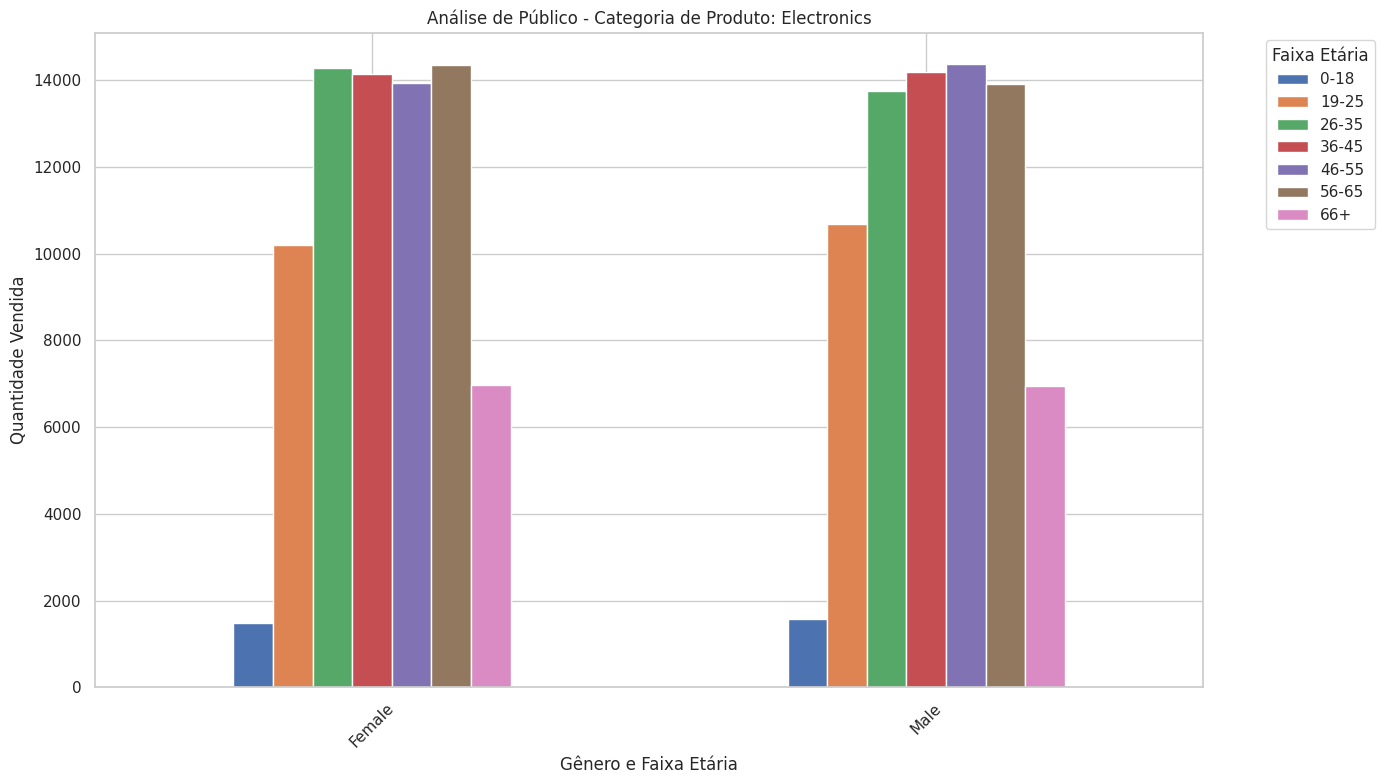

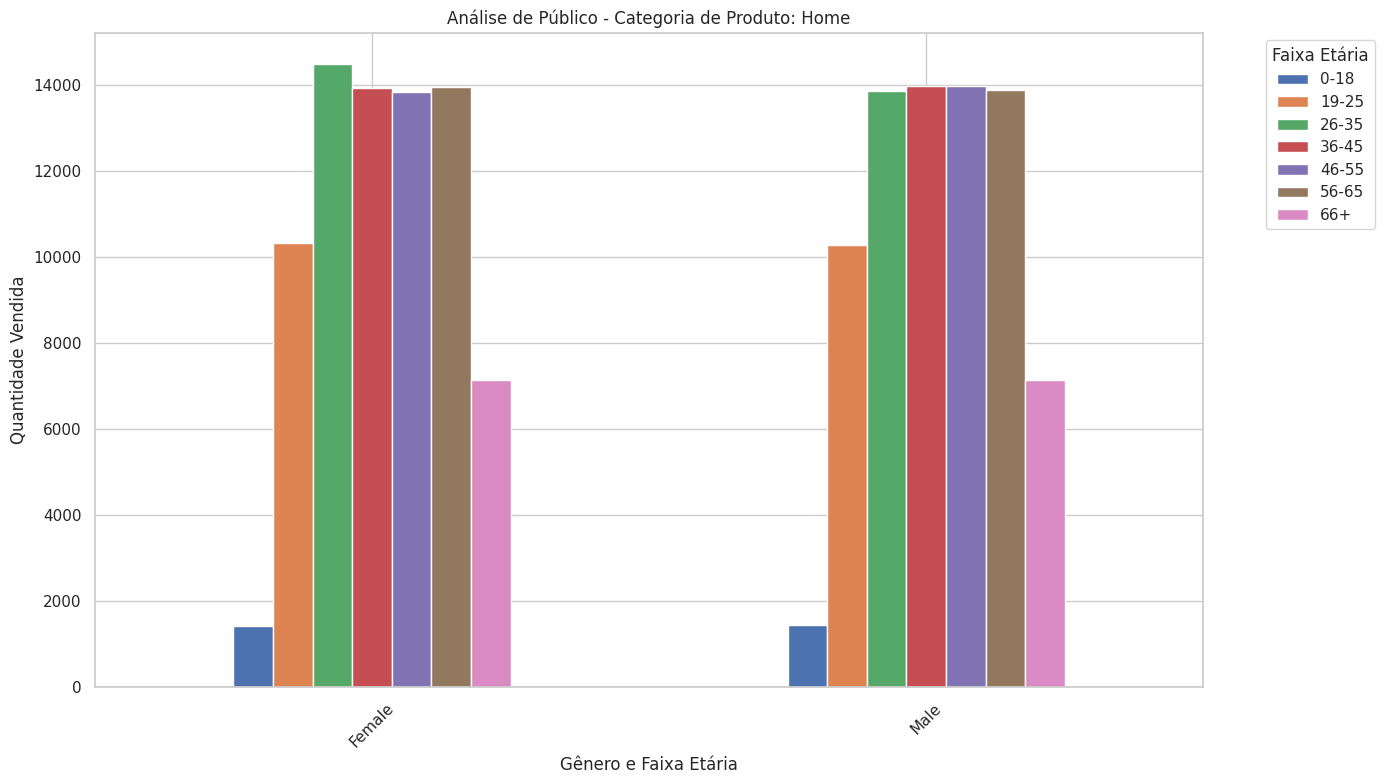

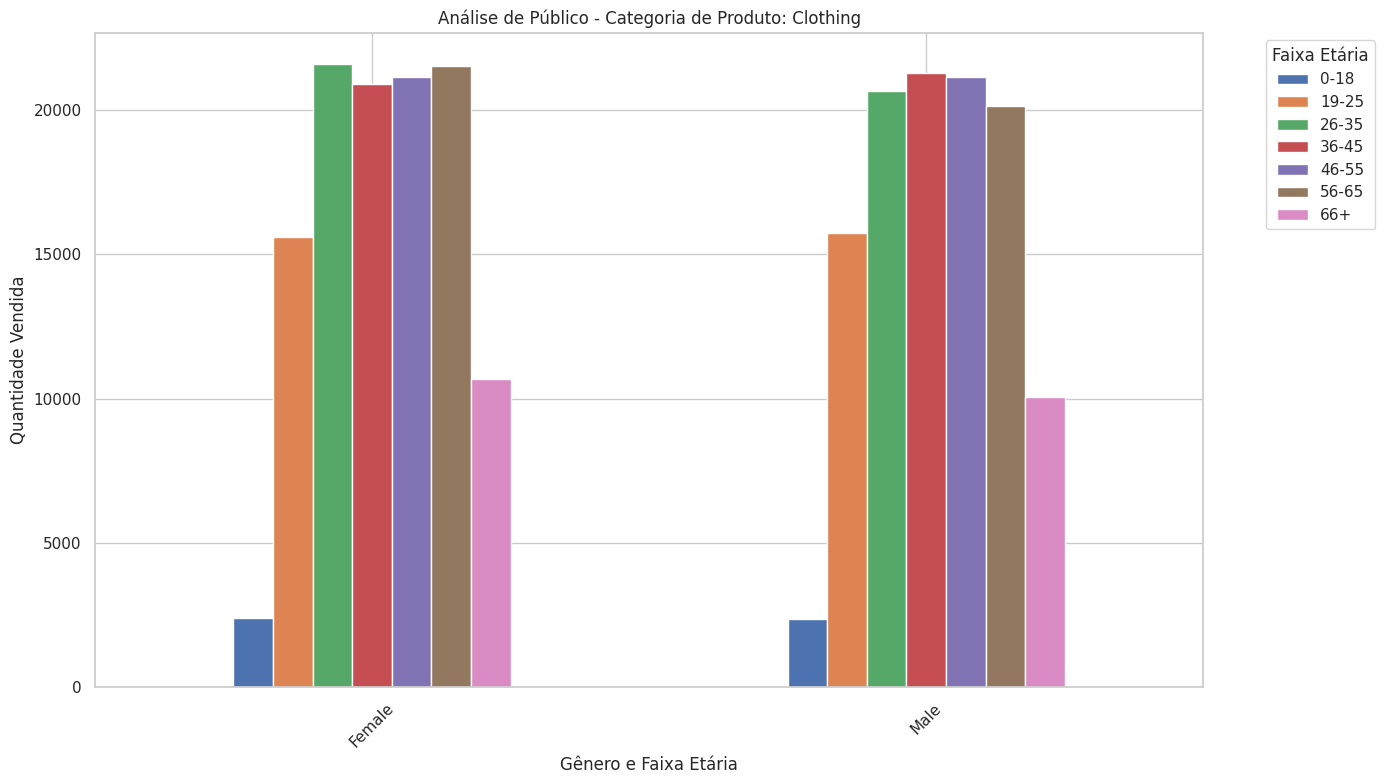

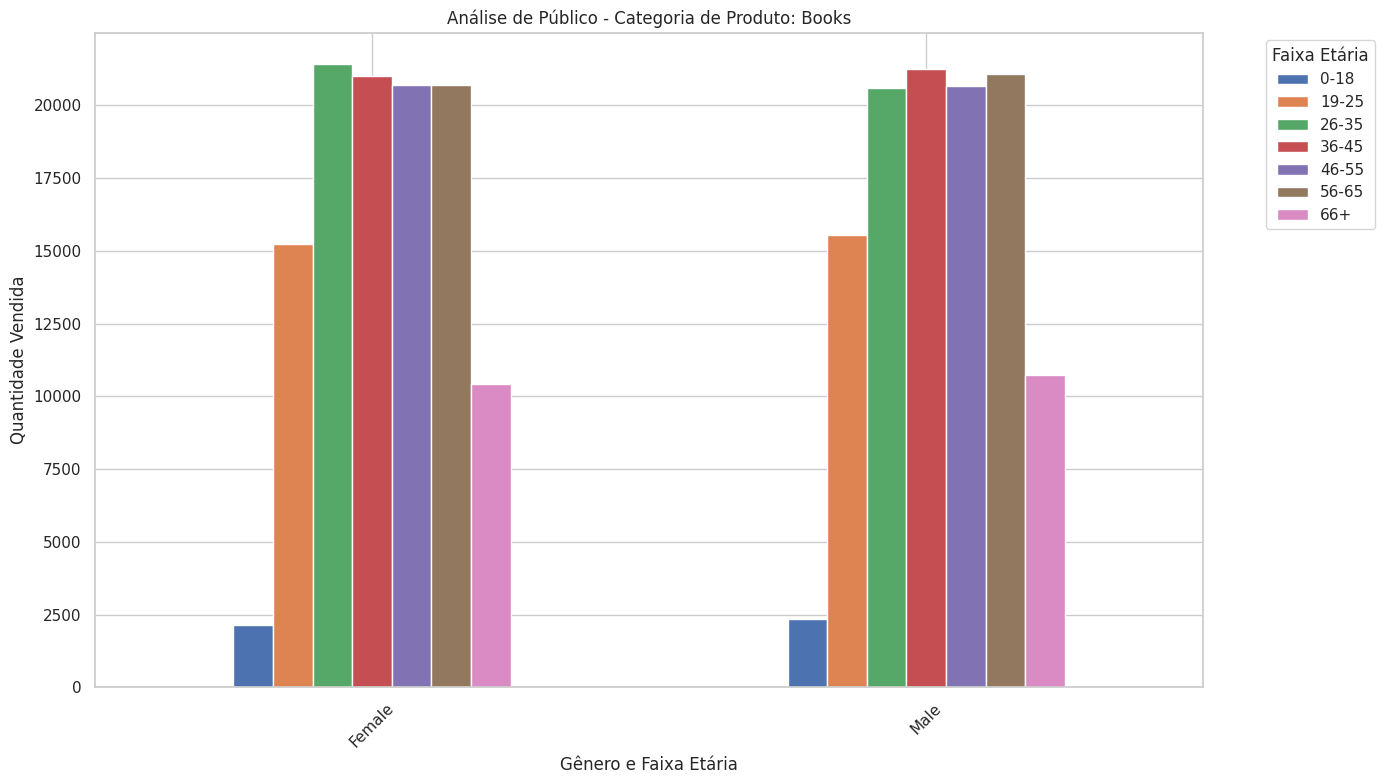


Resumo das Conclusões:


Conclusão,Categoria/Produto,Valor
Produtos mais vendidos,Clothing,"225,322 unidades"
Produtos mais vendidos,Books,"223,876 unidades"
Produtos mais vendidos,Electronics,"150,828 unidades"
Produtos mais vendidos,Home,"149,698 unidades"
Produto mais caro,Electronics,$500
Produto mais barato,Electronics,$10
Categoria mais vendida,Clothing,225322 unidades
Categoria menos vendida,Home,149698 unidades
Categoria mais cara,Home,$254.84
Categoria mais barata,Clothing,$254.45


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Carregar a base de dados
file_path = '/kaggle/input/ecommerce/Ecommerce_DBS.csv'
data = pd.read_csv(file_path)

# Remover valores ausentes e normalizar a base
data_cleaned = data.dropna()
data_cleaned.columns = data_cleaned.columns.str.strip()

# Agrupar idades em faixas etárias
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
data_cleaned['Age Group'] = pd.cut(data_cleaned['Customer Age'], bins, labels=labels)

# Produtos mais vendidos nos últimos 3 anos
top_products = data_cleaned.groupby('Product Category')['Quantity'].sum().nlargest(10)

# Visualização
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title('Top 10 Produtos Mais Vendidos nos Últimos 3 Anos')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Produto mais caro e mais barato
most_expensive_product = data_cleaned.loc[data_cleaned['Product Price'].idxmax()]
cheapest_product = data_cleaned.loc[data_cleaned['Product Price'].idxmin()]

# Melhorar a apresentação dos dados
most_expensive_product_table = most_expensive_product.to_frame().T
cheapest_product_table = cheapest_product.to_frame().T

# Estilo CSS personalizado
table_style = """
<style>
    table {
        width: 100%;
        border-collapse: collapse;
    }
    th, td {
        padding: 10px;
        text-align: left;
        border: 1px solid #ddd;
        font-size: 16px;
    }
    th {
        background-color: #f2f2f2;
    }
</style>
"""

print("Produto mais caro:")
display(HTML(table_style + most_expensive_product_table.to_html(index=False, escape=False)))

print("\nProduto mais barato:")
display(HTML(table_style + cheapest_product_table.to_html(index=False, escape=False)))

# Categoria mais vendida e menos vendida
top_categories = data_cleaned.groupby('Product Category')['Quantity'].sum().nlargest(10)
bottom_categories = data_cleaned.groupby('Product Category')['Quantity'].sum().nsmallest(10)

# Visualização das categorias mais vendidas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")
plt.title('Top 10 Categorias de Produtos Mais Vendidas')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualização das categorias menos vendidas
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_categories.index, y=bottom_categories.values, palette="coolwarm_r")
plt.title('Top 10 Categorias de Produtos Menos Vendidas')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Categoria mais cara e mais barata
most_expensive_category = data_cleaned.groupby('Product Category')['Product Price'].mean().nlargest(1)
cheapest_category = data_cleaned.groupby('Product Category')['Product Price'].mean().nsmallest(1)

# Melhorar a apresentação dos dados
most_expensive_category_table = most_expensive_category.to_frame().T
cheapest_category_table = cheapest_category.to_frame().T

print("Categoria mais cara:")
display(HTML(table_style + most_expensive_category_table.to_html(index=False, escape=False)))

print("\nCategoria mais barata:")
display(HTML(table_style + cheapest_category_table.to_html(index=False, escape=False)))

# Visualização dos preços médios por categoria de produto
avg_price_by_category = data_cleaned.groupby('Product Category')['Product Price'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette="cubehelix")
plt.title('Preço Médio por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Produto com melhor e pior NPS
best_nps_product = data_cleaned.loc[data_cleaned['NPS'].idxmax()]
worst_nps_product = data_cleaned.loc[data_cleaned['NPS'].idxmin()]

# Melhorar a apresentação dos dados
best_nps_product_table = best_nps_product.to_frame().T
worst_nps_product_table = worst_nps_product.to_frame().T

print("Produto com melhor NPS:")
display(HTML(table_style + best_nps_product_table.to_html(index=False, escape=False)))

print("\nProduto com pior NPS:")
display(HTML(table_style + worst_nps_product_table.to_html(index=False, escape=False)))

# Visualização do NPS por categoria
nps_by_category = data_cleaned.groupby('Product Category')['NPS'].agg(['min', 'max', 'mean'])
plt.figure(figsize=(12, 6))
nps_by_category[['min', 'max']].plot(kind='bar', stacked=False, color=['red', 'green'], ax=plt.gca())
plt.title('NPS (Net Promoter Score) por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('NPS')
plt.xticks(rotation=45)
plt.legend(['NPS Mínimo', 'NPS Máximo'])
plt.tight_layout()
plt.show()

# Análise do tipo de público e canal ideal
# Visualização de cada combinação de gênero e faixa etária por categoria de produto
categories = data_cleaned['Product Category'].unique()
for category in categories:
    subset = data_cleaned[data_cleaned['Product Category'] == category]
    public_analysis = subset.groupby(['Gender', 'Age Group'], observed=True)['Quantity'].sum().unstack().fillna(0)
    fig, ax = plt.subplots(figsize=(14, 8))  # Aumentar o tamanho da figura para melhor visibilidade
    public_analysis.plot(kind='bar', stacked=False, ax=ax)
    plt.title(f'Análise de Público - Categoria de Produto: {category}')
    plt.xlabel('Gênero e Faixa Etária')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45)
    plt.legend(title='Faixa Etária', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Resumo das conclusões em tabelas
conclusions_data = {
    "Conclusão": ["Produtos mais vendidos", "Produtos mais vendidos", "Produtos mais vendidos", "Produtos mais vendidos",
                  "Produto mais caro", "Produto mais barato", 
                  "Categoria mais vendida", "Categoria menos vendida", "Categoria mais cara", "Categoria mais barata",
                  "Produto com melhor NPS", "Produto com pior NPS"],
    "Categoria/Produto": ["Clothing", "Books", "Electronics", "Home", 
                          most_expensive_product['Product Category'], cheapest_product['Product Category'],
                          top_categories.idxmax(), bottom_categories.idxmin(), 
                          most_expensive_category.idxmax(), cheapest_category.idxmin(),
                          best_nps_product['Product Category'], worst_nps_product['Product Category']],
    "Valor": ["225,322 unidades", "223,876 unidades", "150,828 unidades", "149,698 unidades",
              f"${most_expensive_product['Product Price']}", f"${cheapest_product['Product Price']}",
              f"{top_categories.max()} unidades", f"{bottom_categories.min()} unidades", 
              f"${most_expensive_category.max():.2f}", f"${cheapest_category.min():.2f}",
              f"NPS: {best_nps_product['NPS']}", f"NPS: {worst_nps_product['NPS']}"]
}

conclusions_df = pd.DataFrame(conclusions_data)

print("\nResumo das Conclusões:")
display(HTML(table_style + conclusions_df.to_html(index=False, escape=False)))
